In [1]:
# 1. Import the libraries
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf 
from plotly.offline import iplot, init_notebook_mode

In [2]:
# 2. Download the data

df_yahoo = yf.download('MSFT', start = '2010-01-01',
                end='2020-12-31',
                progress=False)

In [3]:
# 3. Save only Close price
df_yahoo = df_yahoo.loc[:,  ['Adj Close']]
df_yahoo.rename(columns = {'Adj Close': 'adj_close'}, inplace = True)

In [4]:
# 4. Simple returns 
df_yahoo['simple_rtn'] = df_yahoo['adj_close'].pct_change()

In [5]:
# 5. Log returns
df_yahoo['log_rtn'] = np.log(df_yahoo.adj_close/ df_yahoo.adj_close.shift(1))

In [6]:
df_yahoo.head()

,adj_close,simple_rtn,log_rtn
Date,,,
2009-12-31,23.585039,NaN,NaN
2010-01-04,23.948717,0.015420,0.015302
2010-01-05,23.956453,0.000323,0.000323
2010-01-06,23.809435,-0.006137,-0.006156
2010-01-07,23.561821,-0.010400,-0.010454


In [8]:
# 6. Calculate the rolling mean and standard deviation

df_rolling = df_yahoo[['simple_rtn']].rolling(window = 21).agg(['mean', 'std'])
df_rolling.columns = df_rolling.columns.droplevel()

In [11]:
# 7. Join the rolling metrics to the original data

df_outliers = df_yahoo.join(df_rolling)

In [12]:
# 8. Define a function for detecting outliers

def identify_outliers(row, n_sigmas = 3):
    x = row['simple_rtn']
    mu = row['mean']
    sigma = row['std']
    if (x > mu + 3 * sigma) | (x < mu - 3 * sigma):
        return 1
    else:
        return 0
    

In [15]:
# 9. Identify the outliers and extract them for later use

df_outliers['outlier'] = df_outliers.apply(identify_outliers, axis = 1)
outliers = df_outliers.loc[df_outliers['outlier'] == 1, ['simple_rtn']]

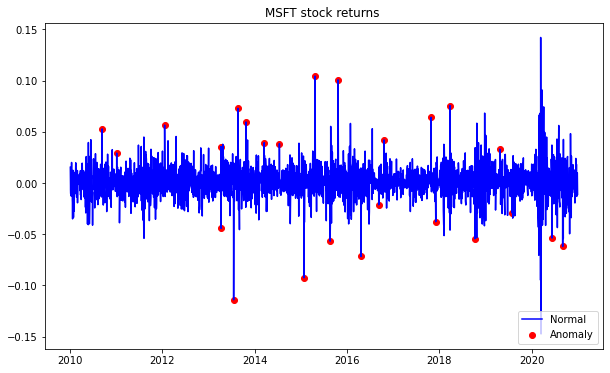

In [23]:
# PLOT THE RESULTS

fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(df_outliers.index, df_outliers.simple_rtn, color = 'blue', label = 'Normal')
ax.scatter(outliers.index, outliers.simple_rtn, color = 'red', label = 'Anomaly')
ax.set_title("MSFT stock returns ")
ax.legend(loc = 'lower right')